In [14]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [15]:
# Membaca dataset
df = pd.read_csv('citrus.csv')

# Menampilkan 5 baris pertama dari dataset
print(df.head())

     name  diameter  weight  red  green  blue
0  orange      2.96   86.76  172     85     2
1  orange      3.91   88.05  166     78     3
2  orange      4.42   95.17  156     81     2
3  orange      4.47   95.60  163     81     4
4  orange      4.48   95.76  161     72     9


In [16]:
# Import library untuk preprocessing
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Transformasi kolom 'name' menjadi label numerik
# Contoh: 'orange' -> 1, 'grapefruit' -> 0
df['label'] = le.fit_transform(df['name'])

# Memisahkan fitur (X) dan target (y)
# Fitur adalah semua kolom kecuali 'name' dan 'label'
# Target adalah kolom 'label'
X = df.drop(columns=['name', 'label'])
y = df['label']

# Membagi dataset menjadi data latih (train) dan data uji (test)
# Dengan proporsi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Inisialisasi model DecisionTreeClassifier dengan random_state untuk hasil yang konsisten
model = DecisionTreeClassifier(random_state=42)

# Melatih model menggunakan data latih (X_train dan y_train)
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji (X_test)
y_pred = model.predict(X_test)

# Menghitung dan mencetak akurasi model
print("Akurasi:", accuracy_score(y_test, y_pred))

# Menampilkan confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Menampilkan classification report untuk evaluasi lebih detail
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.9435

Confusion Matrix:
 [[938  50]
 [ 63 949]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       988
           1       0.95      0.94      0.94      1012

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



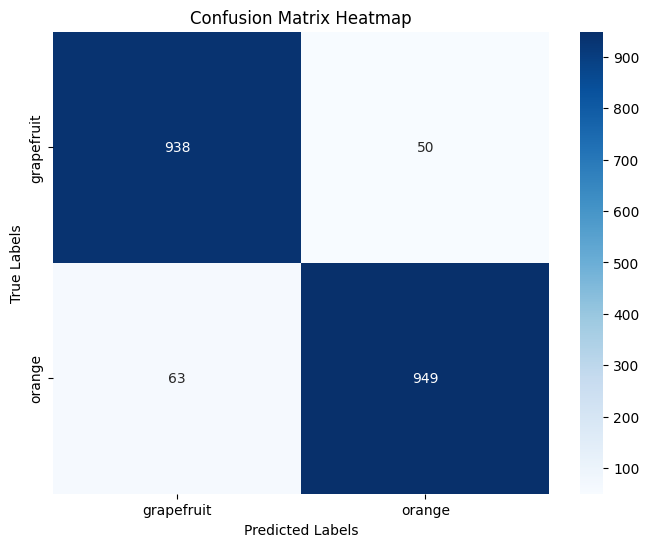

In [18]:
# Import library untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)

# Menambahkan label dan judul pada heatmap
plt.xlabel('Predicted Labels')  # Label pada sumbu X
plt.ylabel('True Labels')       # Label pada sumbu Y
plt.title('Confusion Matrix Heatmap')  # Judul heatmap
plt.show()

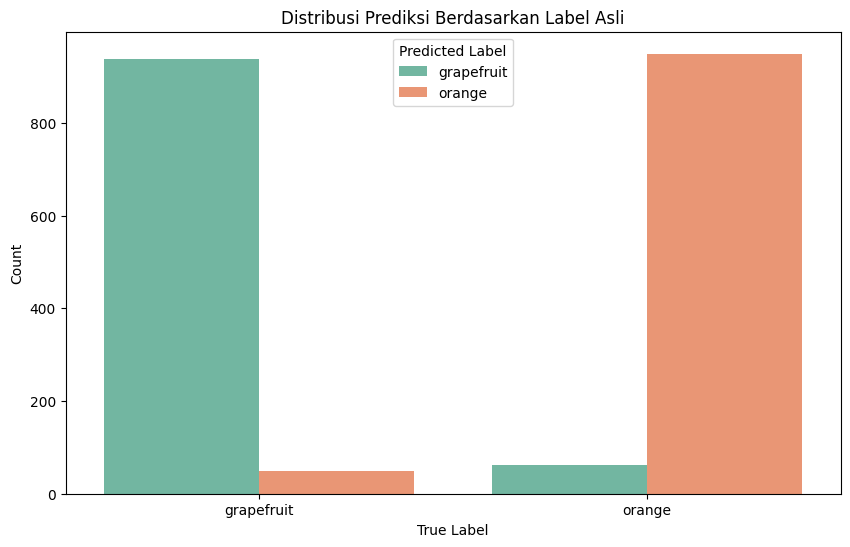

In [19]:
# Visualisasi distribusi prediksi untuk masing-masing kelas
# Membuat DataFrame untuk hasil prediksi
results_df = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_pred})
results_df['True Label'] = results_df['True Label'].map({0: 'grapefruit', 1: 'orange'})
results_df['Predicted Label'] = results_df['Predicted Label'].map({0: 'grapefruit', 1: 'orange'})

# Membuat plot untuk distribusi prediksi
plt.figure(figsize=(10, 6))
sns.countplot(data=results_df, x='True Label', hue='Predicted Label', palette='Set2')

# Menambahkan label dan judul pada plot
plt.xlabel('True Label')  # Label pada sumbu X
plt.ylabel('Count')       # Label pada sumbu Y
plt.title('Distribusi Prediksi Berdasarkan Label Asli')  # Judul plot
plt.legend(title='Predicted Label')  # Legenda
plt.show()